Importar las imágenes del PDF

In [1]:
import cv2
import os
import numpy as np

# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = r"C:\Users\dapar\Desktop\en png"

# Inicializar una lista para almacenar las imágenes
imagenes = []

# Recorre todos los archivos en la carpeta
for nombre_archivo in os.listdir(carpeta_imagenes):
    # Verifica si el archivo tiene una extensión de imagen válida (puedes ajustar las extensiones según tus necesidades)
    if nombre_archivo.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
        # Lee la imagen y la convierte a un array NumPy
        ruta_completa = os.path.join(carpeta_imagenes, nombre_archivo)
        imagen = cv2.imread(ruta_completa)
        if imagen is not None:
            imagenes.append(imagen)

Binarizar las imágenes extraidas

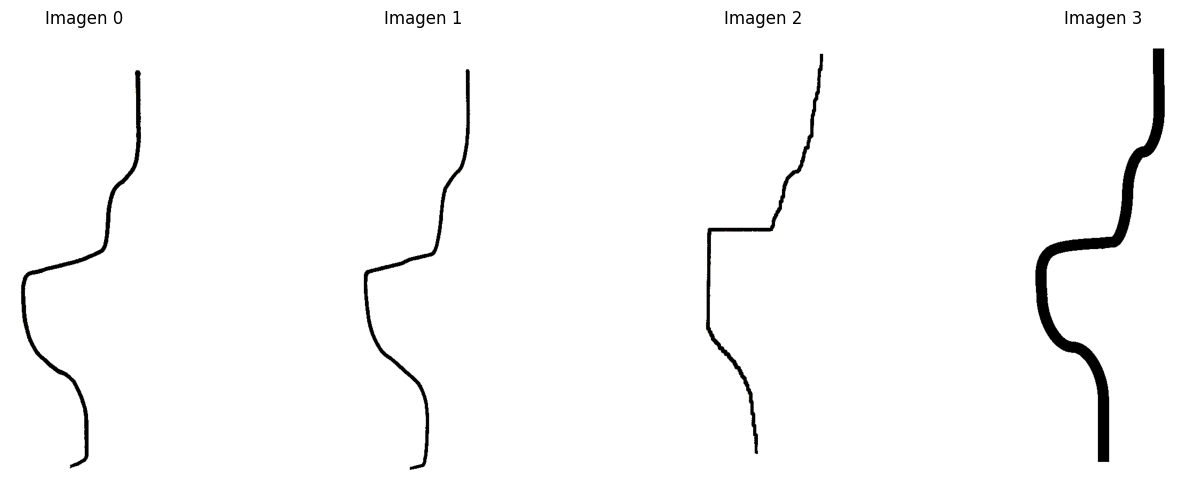

In [2]:
import matplotlib.pyplot as plt

im_bin=[]
for imagen in imagenes:
    _, bin = cv2.threshold(imagen, 200, 255, cv2.THRESH_BINARY)
    im_bin.append(bin)
    
# Crea una figura de Matplotlib con subparcelas
fig, axes = plt.subplots(1, len(im_bin), figsize=(15, 5))

# Itera a través de las imágenes y muéstralas en las subparcelas
for i, image in enumerate(im_bin):
    axes[i].imshow(image, cmap='gray')  # Ajusta el mapa de colores según sea necesario
    axes[i].set_title(f'Imagen {i}')
    axes[i].axis('off')  # Oculta los ejes

# Ajusta el espacio entre las subparcelas
plt.tight_layout()

# Muestra la figura
plt.show()


Comparativa

In [21]:
from skimage.metrics import structural_similarity as ssim
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from scipy.stats import pearsonr

im_original=im_bin[3] #la curva original es el último elemento de im_bin

# Suponiendo que 'im_original' es la curva original y 'im_bin' es la lista de imágenes binarias
for i, im in enumerate(im_bin):
    mse = np.mean((im_original - im) ** 2)
    rmse = np.sqrt(mse)
    psnr = cv2.PSNR(im_original, im)
    mae = np.mean(np.abs(im_original - im))
    ssim_score = ssim(im_original, im, win_size=3, data_range=im_original.max() - im_original.min())

    # Índice de Jaccard
    intersection = np.logical_and(im_original, im)
    union = np.logical_or(im_original, im)
    jaccard = np.sum(intersection) / np.sum(union)

    # Coeficiente de Correlación de Pearson
    corr_coeff, _ = pearsonr(im_original.flatten(), im.flatten())

    print(f"Comparativa con imagen {i+1}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"PSNR: {psnr}")
    print(f"SSIM: {ssim_score}")
    print(f"Índice de Jaccard: {jaccard}")
    print(f"Coeficiente de Pearson: {corr_coeff}\n")



Comparativa con imagen 1:
MSE: 0.08381996907254803
RMSE: 0.2895167854763313
MAE: 3.74805988835247
PSNR: 10.766525037458422
SSIM: 0.8962376865918887
Índice de Jaccard: 0.914804388120929
Coeficiente de Pearson: 0.28103153000527814

Comparativa con imagen 2:
MSE: 0.08611094437346184
RMSE: 0.2934466635923159
MAE: 3.523831574012937
PSNR: 10.649416478617887
SSIM: 0.8944729030938143
Índice de Jaccard: 0.9127580430070472
Coeficiente de Pearson: 0.23813934651351143

Comparativa con imagen 3:
MSE: 0.09139319310220637
RMSE: 0.3023130713386478
MAE: 4.289986308457029
PSNR: 10.39086148995224
SSIM: 0.8895496441130085
Índice de Jaccard: 0.9076204330635294
Coeficiente de Pearson: 0.18351380743035348

Comparativa con imagen 4:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
PSNR: 361.20199909921956
SSIM: 1.0
Índice de Jaccard: 1.0
Coeficiente de Pearson: 0.9999999999991647



Guardar imágenes sin fondo y con distintos colores

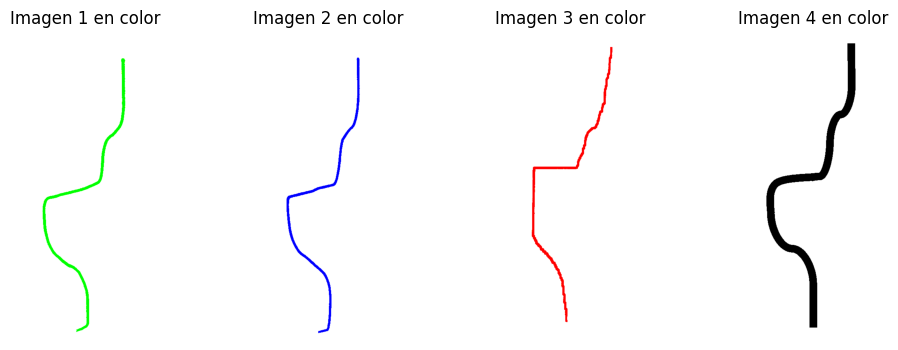

In [90]:
# Colores correspondientes a las tres primeras imágenes: verde, azul y rojo
colors = [(0, 255, 0), (0, 0, 255), (255, 0, 0)]

# Lista para almacenar las imágenes en color
im_color = []

# Iterar a través de las tres primeras imágenes y sus colores correspondientes
for i in range(3):
    image = im_bin[i]
    color = colors[i]

    # Crear una máscara de píxeles negros (donde el valor es 0)
    mask = (image == 255)

    # Crear una imagen en color
    colored_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for c in range(3):
        colored_image[:, :, c] = color[c]

    # Aplicar la máscara para cambiar los píxeles negros a color
    colored_image[mask] = 255  # Cambia los píxeles negros a negro

    # Agregar la imagen en color a la lista 'im_color'
    im_color.append(colored_image)
    
im_color.append(im_bin[3])

# Visualizar las imágenes en color
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(im_color[i])
    axes[i].set_title(f'Imagen {i+1} en color')
    axes[i].axis('off')
plt.show()


In [103]:
from PIL import Image

# Carpeta de destino para guardar las imágenes sin fondo
carpeta = r"X:\Archivos\Documentos\Trabajo\UTPL\Investigación control de disturbios\Imágenes\Resultados escaneados\en png\sin fondo"

# Iterar a través de las imágenes en im_color
for i, imagen in enumerate(im_color):
    # Convierte la imagen en un objeto PIL
    imagen_pil = Image.fromarray(imagen)
    imagen_sf = Image.new("RGBA",imagen_pil.size)
    datas=imagen_pil.getdata()
    newData=[]
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255: # si es de color blanco 
            newData.append((255, 255, 255, 0)) # los colores blancos se hacen invisibles
        else:
            newData.append(item) # los otros colores se mantienen intactos
    
    imagen_sf.putdata(newData)  
    nombre_archivo = f"{carpeta}/imagen_{i + 1}.png"
    imagen_sf.save(nombre_archivo)



In [94]:
from PIL import Image
from rembg import remove

# Carpeta de destino para guardar las imágenes sin fondo
carpeta = r"X:\Archivos\Documentos\Trabajo\UTPL\Investigación control de disturbios\Imágenes\Resultados escaneados\en png\sin fondo"

# Iterar a través de las imágenes en im_color
for i, imagen in enumerate(im_color):
    # Convierte la imagen en un objeto PIL
    imagen_pil = Image.fromarray(imagen)

    # Convierte el color blanco (255, 255, 255) a color transparente
    imagen_pil=remove(imagen_pil)

    # Guarda la imagen con fondo transparente en formato PNG
    nombre_archivo = f"{carpeta}/imagen_{i + 1}.png"
    imagen_pil.save(nombre_archivo) 

100%|#######################################| 176M/176M [00:00<00:00, 56.2GB/s]
